<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl/blob/main/Opt_T6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Cargamos los datos usando gxp y pickle.

In [2]:
import gzip, pickle
with gzip.open('mnist.pkl.gz','rb') as ff :
    u = pickle._Unpickler( ff )
    u.encoding = 'latin1'
    train, val, test = u.load()

In [3]:
print( train[0].shape, train[1].shape )

(50000, 784) (50000,)


Tenemos 50000 arreglos de 784 entradas cada uno, el cual representa un número el cual se puede observar con el siguiente código:

clase:  5


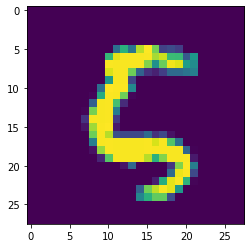

In [7]:
idimg = 2000

im =  train[0][idimg].reshape(-1, 28) #train[0] es una matriz,
#train[0][5000] es un vector de longitud 784
#reshape(-1,28) significa crea una matriz de k x 28 tal que k*28=784
plt.imshow(im)#Plotealo como imagen.
print('clase: ', train[1][idimg])

train[1][k] guarda el número que representa el respectivo train[0][k].

------------------------------------------------

Implementación del descenso de gradiente.

Consideramos el tamaño de paso $\alpha_k=\frac{d_k^Td_k}{d_k^THd_k}$

In [12]:
def get_alpha_k(x,d,H):#Si tenemos H la matriz Hessiana.
    top=np.linalg.norm(d)
    bottom=np.dot(d,np.dot(H,d))
    return (top/bottom)

Nuestra función de descenso recibe una condición inicial $x_0$, la función a minimizar, el gradiente y Hessiano de la misma, y hay parámetros opcionales para tolerancia del gradiente y número máximo de iteraciones, así como un parámetro (False por default) que grafica el valor de $f(x_k)$ y $||g_k||$.

In [8]:
def Steepest_descent(x_0,f,grad_f,Hessian_f,tol_grad=10**(-6),max_iter=10**5,pr="False"):
    alpha_k=get_alpha_k(x=x_0,d=grad_f(x_0),H=Hessian_f(x_0))
    x_1=x_0-alpha_k*np.array(grad_f(x_0))#First iteration
    if(pr=='True'):
        print("Initial approximation: ", x_0)
        F=[f(x_0)]
        G=[np.linalg.norm(grad_f(x_0))]
    x_0=x_1
    k=1
    norm_grad=np.linalg.norm(grad_f(x_1))
    #Cycle
    while(norm_grad>tol_grad and k<max_iter):#stop criteria
        k+=1
        alpha_k=get_alpha_k(x=x_0,d=grad_f(x_0),H=Hessian_f(x_0))
        x_1=x_0-alpha_k*np.array(grad_f(x_0))
        x_0=x_1
        norm_grad=np.linalg.norm(grad_f(x_1))
        if(pr=='True'):
            F.append(f(x_0))
            G.append(np.linalg.norm(grad_f(x_0)))
    if(k==max_iter):
        print("There wasnt convergence after "+str(max_iter)+" iterations.\nLast iteration: "+str(x_1),"   ","f(x_k)= ",str(f(x_1)))
    else:
        L=0
        plt.plot(range(L+1,len(F)),F[L:-1])#Posterior convergence
        plt.title("k vs. F(X_k)")   
        plt.show()         
        plt.plot(range(L+1,len(G)),G[L:-1])
        plt.title("k vs. ||g(X_k)||")   
        plt.show()         
    print("iterations: ",k)
    return (x_1)

Definimos $f$, $\nabla f$ y $H_f$ para el problema.

Primero seleccionamos un subconjunto de los datos, tales que $y\in\{0,1\}$.

In [26]:
y=train[1][train[1]<2]
x=train[0][train[1]<2]
n=len(x)

In [35]:
print(n)

10610


In [41]:
np.outer([2,1],[8,1])

array([[16,  2],
       [ 8,  1]])

In [42]:
n_n=np.zeros(n)+1

In [57]:
A=[2,1],[8,1]
b=[3,3]
A=np.matrix(A)
A=np.c_[A,b]
print(A)

[[2 1 3]
 [8 1 3]]


In [59]:
x_plus=np.c_[x,-1*np.ones(n)]
x_plus.shape

(10610, 785)

In [27]:
def pi_i(i,b,b_0):
    u=np.dot(x[i],b)
    a=1+np.exp(-u-b_0)
    return (1/a)

In [28]:
def h(b_and_b_0):#recibe un vector
    b=b_and_b_0[:-2]
    b_0=b_and_b_0[-1]
    suma=0
    for i in range(n):
        p_i=pi_i(i=i,b=b,b_0=b_0)
        suma+=y[i]*np.log(p_i)+(1-y[i])*np.log(1-p_i)
    return suma